In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, roc_curve, precision_recall_curve, accuracy_score


In [2]:
datamatch = pd.read_csv("C:\\Users\\rohan.fouzdar\\Downloads\\archive\\IPL_Matches_2008_2022.csv")
datamatch.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
databyb = pd.read_csv("C:\\Users\\rohan.fouzdar\\Downloads\\archive\\IPL_Ball_by_Ball_2008_2022.csv")
databyb.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
datamatch['Season'].value_counts()

2013       76
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: Season, dtype: int64

In [5]:
datamatchlast5IPL=datamatch[datamatch['Season'].isin(['2018','2019','2020/21','2021','2022' ])]

In [22]:
prepdata=datamatchlast5IPL.merge(databyb,on='ID')
prepdata.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [24]:
prepdata['extra_type'].value_counts()
prepdata=prepdata[prepdata['extras_run']==0]
prepdata.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
5,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [23]:
prepdata.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'extra_type', 'batsman_run',
       'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery',
       'player_out', 'kind', 'fielders_involved', 'BattingTeam'],
      dtype='object')

In [25]:
NonBoundaryData=prepdata[prepdata['total_run']<4]
NonBoundaryData['NonBoundaryBall']=1
NonBoundaryData.head()

C:\Users\rohan.fouzdar\AppData\Local\Temp\ipykernel_37464\4090456460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NonBoundaryData['NonBoundaryBall']=1


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,NonBoundaryBall
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,1
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,1
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,1
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,1
5,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,1


In [29]:
WicketData=prepdata[prepdata['isWicketDelivery']>0]
WicketData=WicketData[WicketData['kind'].isin(['caught','bowled','lbw','caught and bowled','stumped','hit wicket'])]
WicketData.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
23,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,1,YBK Jaiswal,caught,R Sai Kishore,Rajasthan Royals
49,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,1,SV Samson,caught,R Sai Kishore,Rajasthan Royals
70,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,1,D Padikkal,caught,Mohammed Shami,Rajasthan Royals
72,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,1,JC Buttler,caught,WP Saha,Rajasthan Royals
89,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,1,SO Hetmyer,caught and bowled,NaN,Rajasthan Royals


In [31]:
NonBoundaryData=NonBoundaryData[NonBoundaryData['overs']>16]
WicketData=WicketData[WicketData['overs']>16]
print("NonBoundaryData: ",NonBoundaryData.shape)
print("WicketData: ",WicketData.shape)

NonBoundaryData:  (7016, 37)
WicketData:  (829, 36)


In [32]:
NonBoundaryBalls=NonBoundaryData.groupby(['bowler'])['total_run'].count().to_frame().reset_index()
NonBoundaryBalls.rename(columns={'total_run': 'Non_Boundary_Balls'}, inplace=True)
NonBoundaryBalls.head()

,bowler,Non_Boundary_Balls
0,A Mishra,20
1,A Nortje,124
2,AD Russell,176
3,AF Milne,10
4,AJ Tye,98


In [39]:
NonBoundaryBalls[NonBoundaryBalls['Non_Boundary_Balls']>100].head(25)

,bowler,Non_Boundary_Balls
1,A Nortje,124
2,AD Russell,176
10,Arshdeep Singh,157
11,Avesh Khan,147
12,B Kumar,224
21,CH Morris,127
29,DJ Bravo,297
43,HV Patel,199
50,JC Archer,156
51,JD Unadkat,118


In [41]:
WicketBalls=WicketData.groupby(['bowler'])['total_run'].count().to_frame().reset_index()
WicketBalls.rename(columns={'total_run': 'Wicket_Balls'}, inplace=True)
WicketBalls.head()

,bowler,Wicket_Balls
0,A Mishra,2
1,A Nortje,11
2,AD Russell,26
3,AJ Tye,14
4,AS Joseph,4


In [46]:
WicketBalls[WicketBalls['Wicket_Balls']>10].head(27)

,bowler,Wicket_Balls
1,A Nortje,11
2,AD Russell,26
3,AJ Tye,14
7,Arshdeep Singh,19
8,Avesh Khan,15
9,B Kumar,20
15,CH Morris,22
23,DJ Bravo,34
25,DL Chahar,12
33,HH Pandya,11


In [48]:
DeathBalls=prepdata[prepdata['overs']>16].groupby(['bowler'])['total_run'].count().to_frame().reset_index()
DeathBalls.rename(columns={'total_run': 'Death_Balls'}, inplace=True)
DeathBalls.head()

,bowler,Death_Balls
0,A Mishra,24
1,A Nortje,147
2,AD Russell,241
3,AF Milne,15
4,AJ Tye,130


In [56]:
FocusData=NonBoundaryBalls.merge(WicketBalls,on=['bowler'])
FocusData=FocusData.merge(DeathBalls,on=['bowler'])
FocusData.head()

,bowler,Non_Boundary_Balls,Wicket_Balls,Death_Balls
0,A Mishra,20,2,24
1,A Nortje,124,11,147
2,AD Russell,176,26,241
3,AJ Tye,98,14,130
4,AS Joseph,29,4,39


In [57]:
FocusData['Non_Boundary_at_Death%']=FocusData['Non_Boundary_Balls']*100/FocusData['Death_Balls']
FocusData['Wicket_at_Death%']=FocusData['Wicket_Balls']*100/FocusData['Death_Balls']
FocusData.head()

,bowler,Non_Boundary_Balls,Wicket_Balls,Death_Balls,Non_Boundary_at_Death%,Wicket_at_Death%
0,A Mishra,20,2,24,83.333333,8.333333
1,A Nortje,124,11,147,84.353741,7.482993
2,AD Russell,176,26,241,73.029046,10.788382
3,AJ Tye,98,14,130,75.384615,10.769231
4,AS Joseph,29,4,39,74.358974,10.256410


In [60]:
FocusData=FocusData[FocusData['Death_Balls']>=100]
FocusData=FocusData[FocusData['Wicket_Balls']>=10]
FocusData.head(26)

,bowler,Non_Boundary_Balls,Wicket_Balls,Death_Balls,Non_Boundary_at_Death%,Wicket_at_Death%
1,A Nortje,124,11,147,84.353741,7.482993
2,AD Russell,176,26,241,73.029046,10.788382
3,AJ Tye,98,14,130,75.384615,10.769231
7,Arshdeep Singh,157,19,188,83.510638,10.106383
8,Avesh Khan,147,15,190,77.368421,7.894737
9,B Kumar,224,20,292,76.712329,6.849315
15,CH Morris,127,22,155,81.935484,14.193548
23,DJ Bravo,297,34,373,79.624665,9.115282
25,DL Chahar,94,12,109,86.238532,11.009174
34,HV Patel,199,29,250,79.600000,11.600000


<function matplotlib.pyplot.show(close=None, block=None)>

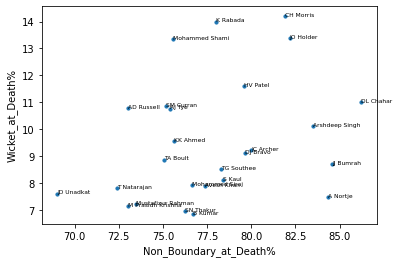

In [63]:
from matplotlib import pyplot as plt
ax=FocusData.plot.scatter(x = 'Non_Boundary_at_Death%', y = 'Wicket_at_Death%', s = 10, alpha=1)
for i, txt in enumerate(FocusData.bowler):
   ax.annotate(txt, (FocusData['Non_Boundary_at_Death%'].iat[i]+0.002, FocusData['Wicket_at_Death%'].iat[i]),fontsize=6)
plt.show

In [64]:
FocusData.to_csv('C:\\Users\\rohan.fouzdar\\Downloads\\DeathOversBestBowler.csv',sep=',',index=False)